# SIR–модель распространения эпидемии

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def SIR(ini_inf, ini_rec, ini_susc, total_pop, cont_coef, rec_coef, time, step):
    # creating data arrays
    t = np.arange(0,time)
    infected = np.empty(time)
    susceptible = np.empty(time)
    recovered = np.empty(time)
    # filling initial data
    infected[0] = ini_inf
    recovered[0] = ini_rec
    susceptible[0] = ini_susc
    ## rounding step
    n_step = round(1/step)
    dt = 1 / n_step # new step
    # culculating
    for day in range(1,time):
        # culculating change in one day
        i = infected[day-1]
        s = susceptible[day-1]
        r = recovered[day-1]
        for step_num in range(n_step):
            ds = -cont_coef*i*s/total_pop  * dt
            dr = rec_coef*i *dt
            di = -ds - dr
            s += ds
            r += dr
            i += di
        infected[day] = i
        recovered[day] = r
        susceptible[day] = s
    return t,infected,recovered,susceptible

# Смотрим результат
Данные по количеству населения взяты со страницы википедии про Санкт-Петербург, а параметры распространения болезни высчитаны из предположения что контактируют с человеком раз в 4 дня и выздоравливают ~ 2 недели

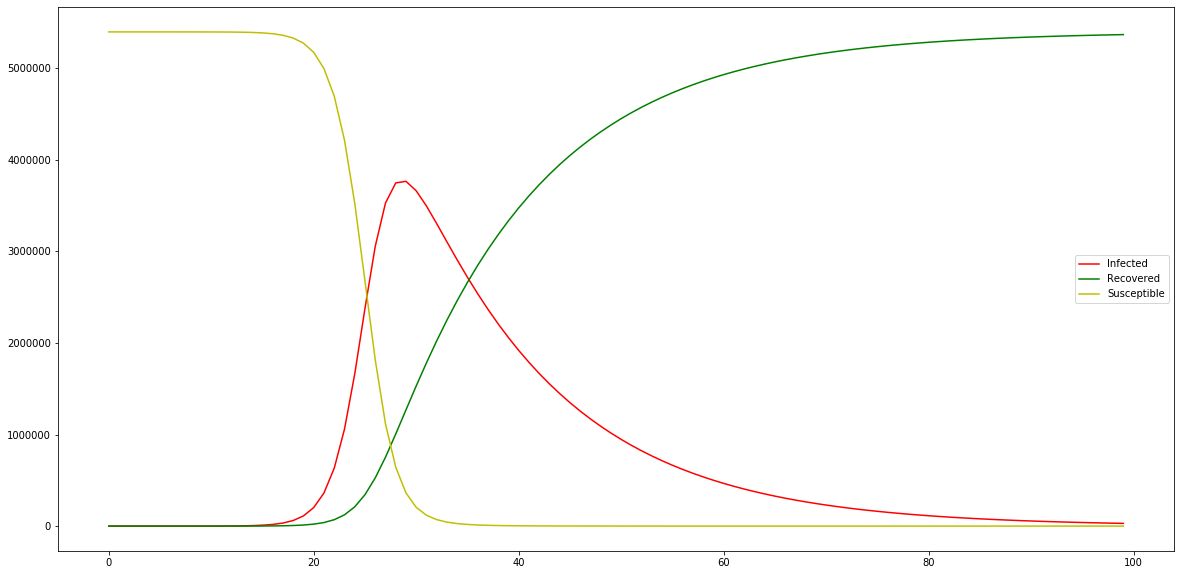

In [45]:
res = SIR(1, 0, 5398064, 5398065, 0.75, 0.07, 100, 0.3)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(res[0],res[1],'r', label = 'Infected')
plt.plot(res[0],res[2],'g', label = 'Recovered')
plt.plot(res[0],res[3],'y', label = 'Susceptible')
plt.legend()

# Интерактивная версия

In [5]:
from ipywidgets import interact, interactive, fixed
import ipywidgets
%matplotlib inline

def SIR_plotter(infectivity,recovery_rate,population,infected):
    suc = population - infected
    res = SIR(infected,0,suc,population,infectivity,recovery_rate,100,0.3)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot(res[0],res[1],'r', label = 'Infected')
    plt.plot(res[0],res[2],'g', label = 'Recovered')
    plt.plot(res[0],res[3],'y', label = 'Susceptible')
    plt.legend()
    
interact(SIR_plotter, infectivity=ipywidgets.FloatSlider(min=0,max=2,step=0.05,value=0.75),
         recovery_rate=ipywidgets.FloatSlider(min=0,max=1,step=0.05,value=0.1),
         population=ipywidgets.IntSlider(min=0,max=6000000,step=5,value=100),
         infected=ipywidgets.IntSlider(min=1,max=6000000,step=5,value=1),)

interactive(children=(FloatSlider(value=0.75, description='infectivity', max=2.0, step=0.05), FloatSlider(valu…

<function __main__.SIR_plotter(infectivity, recovery_rate, population, infected)>